<a href="https://colab.research.google.com/github/Nisanuraltay/Olist-E-Commerce-Analysis/blob/main/Olist_E_Commerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Olist Veri Analizi Projesi**

**Kütüphanelerin Yüklenmesi ve Bağlantılar**
Notebook'unun ilk hücresine gerekli araçlarımızı ekledik. Bu kütüphaneler veri manipülasyonu, istatistiksel testler ve görselleştirme için standarttır.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from google.colab import drive

# Drive'ı bağla
drive.mount('/content/drive')

Mounted at /content/drive


###**A-Veri Birleştirme (Merging) ve Temizlik**

**1. Adım: Veri Setlerini Okuma**

In [2]:
import pandas as pd
import numpy as np

# Dosya yolunu tanımla
path = '/content/' # Klasör adın neyse ona göre güncelle

# Dosyaları yükle
customers = pd.read_csv(path + 'olist_customers_dataset.csv')
items = pd.read_csv(path + 'olist_order_items_dataset.csv')
payments = pd.read_csv(path + 'olist_order_payments_dataset.csv')
reviews = pd.read_csv(path + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(path + 'olist_orders_dataset.csv')
products = pd.read_csv(path + 'olist_products_dataset.csv')
sellers = pd.read_csv(path + 'olist_sellers_dataset.csv')

print("Dosyalar başarıyla yüklendi!")

Dosyalar başarıyla yüklendi!


**2. Adım: Tabloları Birleştirme**

(Master DataFrame)
Analiz yapabilmek için sipariş, müşteri, ürün ve yorum bilgilerini birbirine bağlayacağız

In [3]:
# 1. Siparişler ve Kalemleri birleştir
df = pd.merge(orders, items, on='order_id', how='left')

# 2. Müşteri bilgilerini ekle
df = pd.merge(df, customers, on='customer_id', how='left')

# 3. Ödeme ve Yorum bilgilerini ekle
df = pd.merge(df, payments, on='order_id', how='left')
df = pd.merge(df, reviews, on='order_id', how='left')

# 4. Ürün detaylarını ekle
df = pd.merge(df, products, on='product_id', how='left')

print(f"Birleştirme sonrası toplam satır: {df.shape[0]}")

Birleştirme sonrası toplam satır: 119143


**3. Adım: Veri Tiplerini Düzenleme**

In [4]:
# Tarih içeren sütunların listesi
date_cols = ['order_purchase_timestamp', 'order_approved_at',
             'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col])

print("Tarih dönüşümleri tamamlandı.")

Tarih dönüşümleri tamamlandı.


**4. Adım: Eksik Veri ve İlk Analiz**

In [5]:
# Eksik değerleri kontrol et
print(df.isnull().sum())

# Temel istatistiklere bir göz at
df.describe()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,119143,118966,117057,115722,119143,118310.000000,118310.000000,118310.000000,119143.000000,119140.000000,119140.000000,119140.000000,118146.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000
mean,2017-12-29 18:36:13.115760128,2017-12-30 04:49:18.425726976,2018-01-03 08:24:34.395524864,2018-01-12 20:55:38.199616,2018-01-22 15:21:10.241642240,1.196543,120.646603,20.032387,35033.451298,1.094737,2.941246,172.735135,4.015582,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,0.850000,0.000000,1003.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,2017-09-10 20:15:46,2017-09-11 15:50:48.500000,2017-09-14 19:52:12,2017-09-22 21:54:31.249999872,2017-10-02 00:00:00,1.000000,39.900000,13.080000,11250.000000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,2018-01-17 11:59:12,2018-01-17 16:49:49,2018-01-23 17:03:08,2018-02-01 03:17:55,2018-02-14 00:00:00,1.000000,74.900000,16.280000,24240.000000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,2018-05-03 13:18:30,2018-05-03 16:56:53,2018-05-07 14:57:00,2018-05-15 00:08:31.500000,2018-05-25 00:00:00,1.000000,134.900000,21.180000,58475.000000,1.000000,4.000000,189.240000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,21.000000,6735.000000,409.680000,99990.000000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000
std,NaN,NaN,NaN,NaN,NaN,0.699489,184.109691,15.836850,29823.198969,0.730141,2.777848,267.776077,1.400436,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139


**En çok sipariş edilen ürün kategorisi hangisi?**

In [6]:
df['product_category_name'].value_counts().head(1)

,count
product_category_name,
cama_mesa_banho,11988


In [10]:
# Veri çerçevesinin boyutlarını kontrol et
df.shape


(119143, 36)

###**B-Tanımlayıcı İstatistikler**

**Sipariş Fiyatı İstatistikleri**
Müşteriler ortalama ne kadar harcıyor? Uç değerler (çok pahalı ürünler) var mı?

Ortalama Sipariş Fiyatı: 120.64660341475785
Medyan Sipariş Fiyatı: 74.9
En Yüksek Fiyat: 6735.0


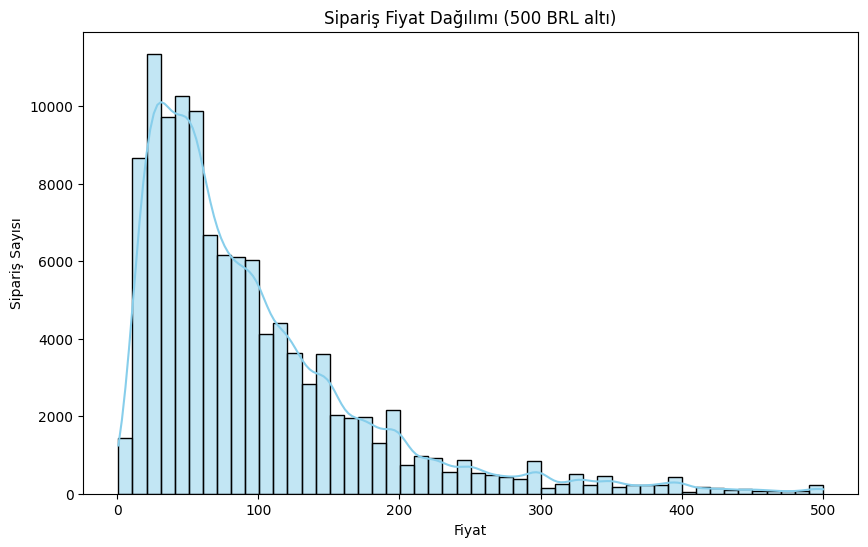

In [12]:
# Temel fiyat istatistikleri
print("Ortalama Sipariş Fiyatı:", df['price'].mean())
print("Medyan Sipariş Fiyatı:", df['price'].median())
print("En Yüksek Fiyat:", df['price'].max())

# Sipariş fiyatı dağılımı histogramı
plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] < 500]['price'], bins=50, kde=True, color='skyblue')
plt.title('Sipariş Fiyat Dağılımı (500 BRL altı)')
plt.xlabel('Fiyat')
plt.ylabel('Sipariş Sayısı')
plt.show()

**2. Ödeme Yöntemi Dağılımı**
İnsanlar en çok nasıl ödeme yapıyor? Bu, işletme için kritik bir içgörüdür.

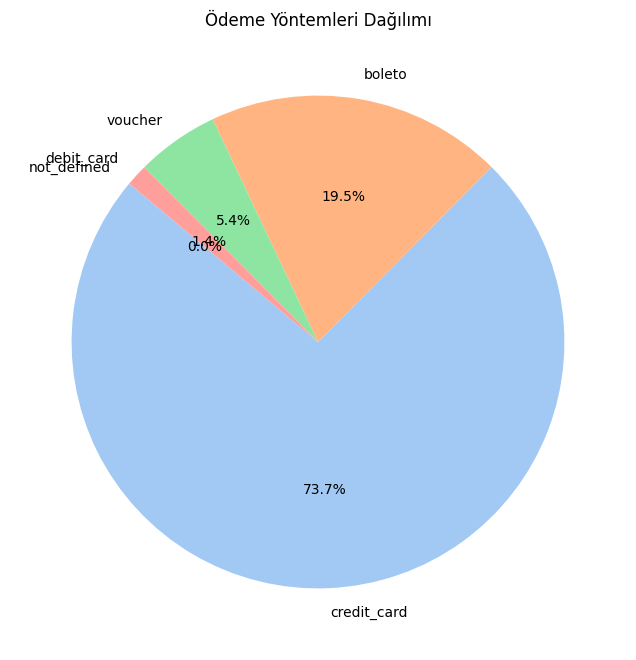

In [13]:
payment_counts = df['payment_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Ödeme Yöntemleri Dağılımı')
plt.show()

**3. Teslimat Süresi Analizi**
Müşteri memnuniyetini en çok etkileyen faktörü hesaplamaya çalıştık. "Sipariş verildiği an" ile "Müşteriye ulaştığı an" arasındaki farkı gün olarak bulduk.

Ortalama Teslimat Süresi: 12.02 gün
Medyan Teslimat Süresi: 10.0 gün


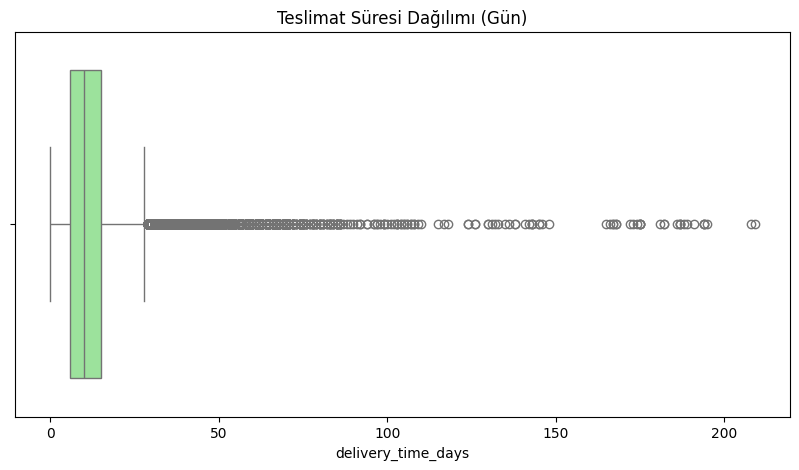

In [14]:
# Teslimat süresini gün bazında hesapla
df['delivery_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Boş (teslim edilmemiş) değerleri temizle
delivery_stats = df.dropna(subset=['delivery_time_days'])

print(f"Ortalama Teslimat Süresi: {delivery_stats['delivery_time_days'].mean():.2f} gün")
print(f"Medyan Teslimat Süresi: {delivery_stats['delivery_time_days'].median()} gün")

# Teslimat süresi kutu grafiği (Boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(x=delivery_stats['delivery_time_days'], color='lightgreen')
plt.title('Teslimat Süresi Dağılımı (Gün)')
plt.show()

**Müşteri memnuniyet puanlarının (review_score) ortalaması kaç?**

In [16]:
df['review_score'].mean()

np.float64(4.015582414978078)

###**C-Hipotez Testi (A/B Testi)**

Müşteri memnuniyetinin (4.01) teslimat hızıyla bir ilişkisi var mı, yoksa tamamen tesadüf mü?

**Senaryo: Hızlı Teslimat vs. Geç Teslimat**
Müşterileri iki gruba ayıralım:

**1-Hızlı Grup:** 10 gün ve altında teslim alanlar (Medyan değerimiz 10 olduğu için veriyi tam ortadan bölüyoruz).

**2-Yavaş Grup:** 10 günün üzerinde teslim alanlar.

**Hipotezimiz:**

$H_0$ (Sıfır Hipotezi): Teslimat süresinin memnuniyet puanı üzerinde anlamlı bir etkisi yoktur.

$H_1$ (Alternatif Hipotezi): Hızlı teslimat, anlamlı derecede daha yüksek memnuniyet puanı sağlar.

In [17]:
# Grupları oluştur
hizli_grup = df[df['delivery_time_days'] <= 10]['review_score'].dropna()
yavas_grup = df[df['delivery_time_days'] > 10]['review_score'].dropna()

# Grupların ortalamalarını gör
print(f"Hızlı Teslimat Memnuniyet Ortalaması: {hizli_grup.mean():.2f}")
print(f"Yavaş Teslimat Memnuniyet Ortalaması: {yavas_grup.mean():.2f}")

# T-Testi uygula
t_stat, p_value = stats.ttest_ind(hizli_grup, yavas_grup)

print(f"\nT-İstatistiği: {t_stat:.4f}")
print(f"P-Değeri: {p_value:.4f}")

# Sonucu yorumla
if p_value < 0.05:
    print("\nSONUÇ: H0 reddedildi! Teslimat süresi ile memnuniyet arasında istatistiksel olarak anlamlı bir fark var.")
else:
    print("\nSONUÇ: H0 reddedilemedi. Fark tesadüfi olabilir.")

Hızlı Teslimat Memnuniyet Ortalaması: 4.29
Yavaş Teslimat Memnuniyet Ortalaması: 3.83

T-İstatistiği: 58.7760
P-Değeri: 0.0000

SONUÇ: H0 reddedildi! Teslimat süresi ile memnuniyet arasında istatistiksel olarak anlamlı bir fark var.


/tmp/ipython-input-2368101477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Hızlı Teslimat (<=10 gün)', 'Yavaş Teslimat (>10 gün)'],


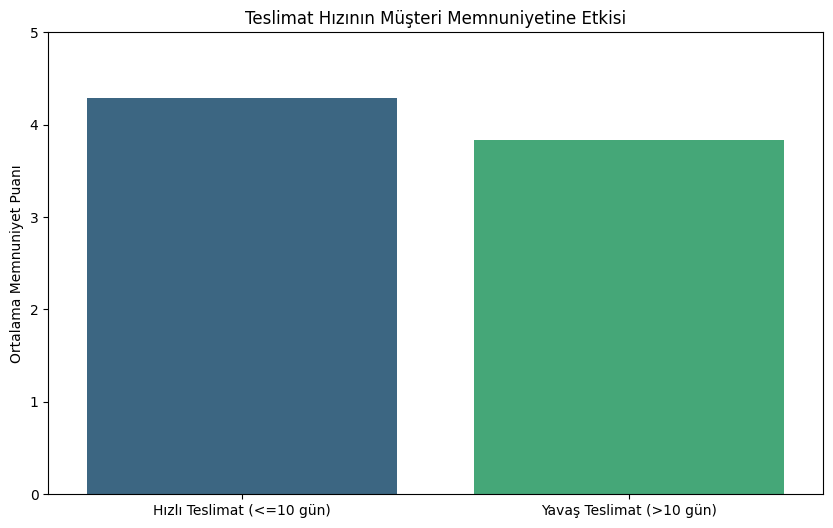

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['Hızlı Teslimat (<=10 gün)', 'Yavaş Teslimat (>10 gün)'],
            y=[hizli_grup.mean(), yavas_grup.mean()], palette='viridis')
plt.ylim(0, 5) # Puanlama 1-5 arası olduğu için
plt.title('Teslimat Hızının Müşteri Memnuniyetine Etkisi')
plt.ylabel('Ortalama Memnuniyet Puanı')
plt.show()

###**C-Sonuç ve Aksiyon Önerileri (Business Insights)**



**1-Lojistik Eşiği:** Analiz, 10 günün kritik bir eşik olduğunu gösteriyor. Şirket, kargo operasyonlarını 10 gün altına indirmeye odaklanmalı.

**2-Ödeme Stratejisi:** Müşterilerin %73.7'si kredi kartı kullanıyor. Bu kitleye özel taksit veya kampanya seçenekleri sunulabilir.

**3-Risk Grubu:** Teslimat süresi 50 günü aşan uç değerler (boxplot'taki noktalar) marka imajına en çok zarar veren kısımdır. Bu siparişler için acil bir telafi mekanizması kurulmalı.